In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
customer = pd.read_csv('E:/DataSetProject2/Customer Acqusition.csv')
repayment = pd.read_csv('E:/DataSetProject2/Repayment.csv')
spend = pd.read_csv('E:/DataSetProject2/Spend.csv')

In [4]:
customer = pd.read_csv('E:/DataSetProject2/Customer Acqusition.csv',usecols = ['Customer','Age','City','Product','Limit','Company','Segment'])
customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [5]:
repayment = pd.read_csv('E:/DataSetProject2/Repayment.csv',usecols = ['Customer','Month','Amount'])


In [6]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [7]:
spend = pd.read_csv('E:/DataSetProject2/Spend.csv', usecols= ['Customer','Month','Type','Amount'])

In [8]:
spend

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1495,A67,4-Feb-06,BUS TICKET,356872.73
1496,A68,25-Mar-06,BUS TICKET,204971.10
1497,A69,31-Mar-06,BUS TICKET,50449.44
1498,A70,23-Mar-06,BUS TICKET,80593.94


In [9]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [10]:
repayment.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [11]:
repayment.dropna(inplace=True)

In [12]:
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [13]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [14]:
print(customer.shape)
print(repayment.shape)
print(spend.shape)

(100, 7)
(1500, 3)
(1500, 4)


In [15]:
customer.head(1)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [16]:
repayment.head(1)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75


In [17]:
spend.head(1)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.8


###### 1.a. In case age is less than 18, replace it with mean of age values.


In [18]:
customer.Age = np.where(customer.Age<18, customer.Age.mean(),customer.Age)
customer.head(1)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


##### 1.b.In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

In [19]:
cust_spend = pd.merge(left = customer, right = spend , on ='Customer')

In [20]:
cust_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [21]:
cust_spend.Amount = np.where(cust_spend.Amount > cust_spend.Limit , cust_spend.Limit/2,cust_spend.Amount)
cust_spend.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8


##### 1.c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [22]:
cust_repayment = pd.merge(left = customer , right = repayment, on='Customer')
cust_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [23]:
cust_repayment.Amount = np.where(cust_repayment.Amount > cust_repayment.Limit , cust_repayment.Limit,cust_repayment.Amount)

In [24]:
cust_repayment.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75


##### 2.a. How many distinct customers exist?


In [25]:
distinct_cust = customer['Customer'].nunique
distinct_cust

<bound method IndexOpsMixin.nunique of 0       A1
1       A2
2       A3
3       A4
4       A5
      ... 
95     A96
96     A97
97     A98
98     A99
99    A100
Name: Customer, Length: 100, dtype: object>

##### 2b. How many distinct categories exist?

In [26]:
distinct_cat=customer['Segment'].value_counts()
distinct_cat

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

##### 2c. What is the average monthly spend by customers?

In [27]:
spend['Month'] = pd.to_datetime(spend['Month'])
spend.head(1)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.8


In [28]:
spend['monthly_spend'] = spend['Month'].apply(lambda x : pd.Timestamp.strftime(x,format='%m'))
spend['yearly_spend'] = spend['Month'].apply(lambda x : pd.Timestamp.strftime(x,format ='%Y'))

In [29]:
spend

,Customer,Month,Type,Amount,monthly_spend,yearly_spend
0,A1,2004-01-12,JEWELLERY,485470.80,01,2004
1,A1,2004-01-03,PETRO,410556.13,01,2004
2,A1,2004-01-15,CLOTHES,23740.46,01,2004
3,A1,2004-01-25,FOOD,484342.47,01,2004
4,A1,2005-01-17,CAMERA,369694.07,01,2005
...,...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,02,2006
1496,A68,2006-03-25,BUS TICKET,204971.10,03,2006
1497,A69,2006-03-31,BUS TICKET,50449.44,03,2006
1498,A70,2006-03-23,BUS TICKET,80593.94,03,2006


In [30]:
tran_spend = spend.groupby(['yearly_spend','monthly_spend']).mean()
tran_spend

Amount
yearly_spend monthly_spend               
2004         01             251712.068664
             02             221215.270000
             03             232146.119286
             04             235272.037143
             05             217539.236429
             09             310923.383571
             11             270486.397857
2005         01             292741.372857
             02             229802.279821
             04             252181.326429
             05             245696.515429
             06             262688.112857
             07             229116.663571
             08             233734.634286
             09             188666.202143
             10             194568.640714
             11             286143.322857
             12             147503.060000
2006         01             282058.006429
             02             253858.260714
             03             247166.084654
             04             232468.967553
             05             236162.740357
             06             177252.386429
             07             287505.098929
             08             240699.717143
             09             158520.090714
             10             236136.335000
             11             182841.290000
             12             270470.980714

##### 2d. What is the average monthly repayment by customers?


In [31]:
repayment['Month'] = pd.to_datetime(repayment['Month'])

In [32]:
repayment['monthly_repay'] = repayment['Month'].apply(lambda x : pd.Timestamp.strftime(x,format='%m'))
repayment['yearly_repay'] = repayment['Month'].apply(lambda x : pd.Timestamp.strftime(x,format ='%Y'))

In [33]:
repayment_spend = repayment.groupby(['yearly_repay','monthly_repay']).mean()
repayment_spend

Amount
yearly_repay monthly_repay               
2004         01             243489.649786
             02             256702.630741
             03             252585.280667
             04             259141.679000
             05             226162.720800
             09             184487.848750
             11             209592.238000
2005         01             240548.098148
             02             238829.265123
             04             212688.631333
             05             263207.367857
             06             210199.818333
             07             239871.479167
             08             264430.921622
             09             247700.170000
             10             219849.956667
             11             256695.120000
             12             320379.335833
2006         01             293475.389167
             02             284489.565128
             03             240851.266814
             04             275472.251889
             05             256920.884943
             06             251990.453333
             07             257936.383243
             08             224143.992500
             09             262533.880833
             10             260765.480000
             11             199399.197407
             12             252736.569167

In [34]:
repayment

,Customer,Month,Amount,monthly_repay,yearly_repay
0,A1,2004-01-12,495414.75,01,2004
1,A1,2004-01-03,245899.02,01,2004
2,A1,2004-01-15,259490.06,01,2004
3,A1,2004-01-25,437555.12,01,2004
4,A1,2005-01-17,165972.88,01,2005
...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,05,2005
1496,A68,2006-05-10,319836.49,05,2006
1497,A69,2006-07-11,247628.45,07,2006
1498,A70,2005-08-12,454016.51,08,2005


In [35]:
cust_spend_repay = pd.merge(left=cust_spend,right=repayment,on="Customer",how="left")
cust_spend_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,monthly_repay,yearly_repay
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,01,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,01,2004


In [36]:
cust_spend_repay.rename(columns={'Amount_x':'amt_spend','Amount_y':'amt_repay'},inplace = True)

In [37]:
interest = cust_spend_repay.groupby(['yearly_repay','monthly_repay'])['amt_spend','amt_repay'].sum()

C:\Users\HP\AppData\Local\Temp/ipykernel_2488/725159346.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest = cust_spend_repay.groupby(['yearly_repay','monthly_repay'])['amt_spend','amt_repay'].sum()


In [38]:
interest['monthly_profit']=interest['amt_repay'] - interest['amt_spend']

In [39]:
interest['interest_earn']= (2.9*interest['monthly_profit'])/100
interest

amt_spend     amt_repay  monthly_profit  \
yearly_repay monthly_repay                                               
2004         01             1.088357e+09  1.699210e+09    6.108525e+08   
             02             7.613922e+07  1.602419e+08    8.410268e+07   
             03             5.594171e+07  8.974470e+07    3.380298e+07   
             04             1.194516e+08  2.285403e+08    1.090887e+08   
             05             8.800456e+07  1.411594e+08    5.315485e+07   
             09             5.144278e+07  8.016122e+07    2.871844e+07   
             11             5.504612e+07  7.860290e+07    2.355678e+07   
2005         01             1.324129e+08  1.810333e+08    4.862042e+07   
             02             5.890557e+08  9.416163e+08    3.525606e+08   
             04             9.366405e+07  1.747894e+08    8.112539e+07   
             05             7.149030e+08  1.099197e+09    3.842944e+08   
             06             1.174019e+08  2.213774e+08    1.039755e+08   
             07             3.995653e+07  7.997268e+07    4.001615e+07   
             08             1.361400e+08  2.477449e+08    1.116049e+08   
             09             3.195551e+07  7.530449e+07    4.334898e+07   
             10             3.140993e+07  6.027830e+07    2.886837e+07   
             11             1.532278e+08  2.763119e+08    1.230841e+08   
             12             4.348638e+07  9.944533e+07    5.595895e+07   
2006         01             5.127574e+07  8.974491e+07    3.846917e+07   
             02             1.654843e+08  2.903280e+08    1.248436e+08   
             03             7.393854e+08  1.115725e+09    3.763400e+08   
             04             3.229722e+08  6.093666e+08    2.863944e+08   
             05             3.297954e+08  5.434823e+08    2.136869e+08   
             06             5.302118e+07  6.914431e+07    1.612313e+07   
             07             1.444093e+08  2.245720e+08    8.016271e+07   
             08             5.849630e+07  7.167032e+07    1.317402e+07   
             09             5.395681e+07  8.083199e+07    2.687518e+07   
             10             5.285823e+07  7.890924e+07    2.605102e+07   
             11             1.124836e+08  1.355832e+08    2.309955e+07   
             12             4.585222e+07  7.087702e+07    2.502480e+07   

                            interest_earn  
yearly_repay monthly_repay                 
2004         01              1.771472e+07  
             02              2.438978e+06  
             03              9.802865e+05  
             04              3.163572e+06  
             05              1.541491e+06  
             09              8.328349e+05  
             11              6.831466e+05  
2005         01              1.409992e+06  
             02              1.022426e+07  
             04              2.352636e+06  
             05              1.114454e+07  
             06              3.015290e+06  
             07              1.160468e+06  
             08              3.236542e+06  
             09              1.257121e+06  
             10              8.371827e+05  
             11              3.569438e+06  
             12              1.622810e+06  
2006         01              1.115606e+06  
             02              3.620465e+06  
             03              1.091386e+07  
             04              8.305437e+06  
             05              6.196920e+06  
             06              4.675707e+05  
             07              2.324719e+06  
             08              3.820465e+05  
             09              7.793803e+05  
             10              7.554795e+05  
             11              6.698869e+05  
             12              7.257193e+05

##### 2.f. What are the top 5 product types?

In [40]:
spend.head(2)

,Customer,Month,Type,Amount,monthly_spend,yearly_spend
0,A1,2004-01-12,JEWELLERY,485470.80,01,2004
1,A1,2004-01-03,PETRO,410556.13,01,2004


In [41]:
spend.groupby(['Type'])['Amount'].sum().reset_index().sort_values('Amount',ascending = False)

,Type,Amount
10,PETRO,49863174.09
4,CAMERA,41481571.96
7,FOOD,37773338.43
14,TRAIN TICKET,33067077.15
0,AIR TICKET,32955445.42
13,SHOPPING,28210354.51
6,CLOTHES,24651102.49
3,BUS TICKET,24554787.97
8,JEWELLERY,22242396.96
9,MOVIE TICKET,19644829.93


#### 2.g. Which city is having maximum spend?


In [42]:
cust_spend.groupby(['City'])['Amount'].sum().reset_index().sort_values('Amount',ascending = False)

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


### 2h. Which age group is spending more money?


In [43]:
cust_spend['Age_Group']=np.where(((cust_spend.Age >= 18) & (cust_spend.Age < 25)), 'teenager',np.where(((cust_spend.Age >= 25) & (cust_spend.Age< 60)), 'adult','senior'))

In [44]:
cust_spend.groupby('Age_Group')['Amount'].sum()

Age_Group
adult       1.557433e+08
senior      4.935734e+07
teenager    1.468050e+07
Name: Amount, dtype: float64

#### 2.i. Who are the top 10 customers in terms of repayment?

In [45]:
cust_repayment.groupby(['Customer'])['Amount'].sum().reset_index().sort_values('Amount',ascending = False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


##### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [46]:
cust_spend['Month'] = pd.to_datetime(cust_spend['Month'])

In [47]:
cust_spend['yearly'] = cust_spend['Month'].apply(lambda x : pd.Timestamp.strftime(x , format='%Y'))

In [48]:
cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,senior,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,senior,2004


In [49]:
prod_year_pivot = pd.pivot_table(data = cust_spend , index=['City','yearly'] , columns = 'Product' ,values ='Amount', aggfunc = sum  )

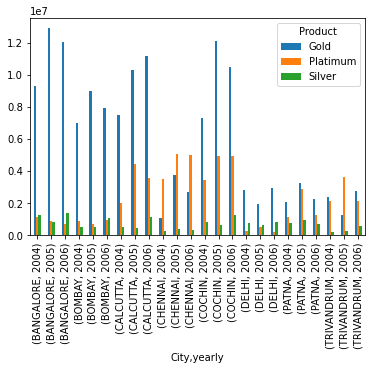

In [50]:
prod_year_pivot.plot(kind='bar')
plt.show()

#### 4 a. Monthly comparison of total spends, city wise

In [51]:
cust_spend['monthly'] = cust_spend['Month'] . apply (lambda x: pd.Timestamp.strftime(x ,'%B'))

In [52]:
cust_spend.groupby(['monthly','City'])['Amount'].sum().reset_index()

,monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


In [53]:
spend_city =pd.pivot_table(data = cust_spend, values='Amount', index='City', columns='monthly', aggfunc='sum')

<AxesSubplot:xlabel='City'>

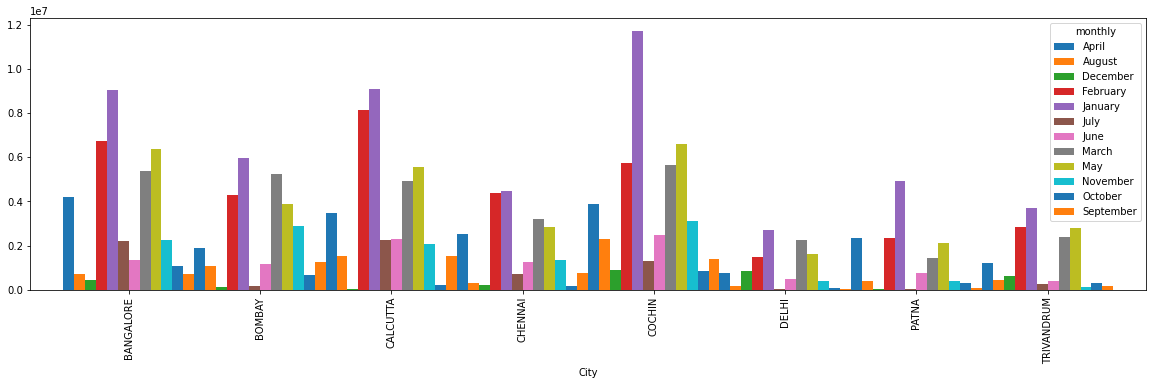

In [54]:
spend_city.plot(kind='bar',figsize=(20,5),width =1 )

##### 4.b. Comparison of yearly spend on air tickets

In [55]:
air_ticket = cust_spend[cust_spend.Type=='AIR TICKET']
air_ticket = air_ticket.groupby(['yearly','Type'])[['Amount']].sum().reset_index()
air_ticket

,yearly,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2005,AIR TICKET,10550152.21
2,2006,AIR TICKET,5248469.56


Text(0, 0.5, 'Amount')

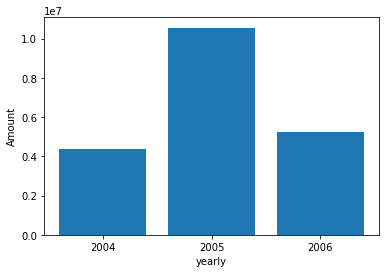

In [56]:
plt.bar(x='yearly',height='Amount',data =air_ticket)
plt.xlabel('yearly')
plt.ylabel('Amount')

#### 4.c.Comparison of monthly spend for each product (look for any seasonalitythat exists in terms of spend)

In [57]:
prod_mon=pd.pivot_table(data = cust_spend,values='Amount',index = 'Product',columns='monthly',aggfunc='sum')
prod_mon

monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


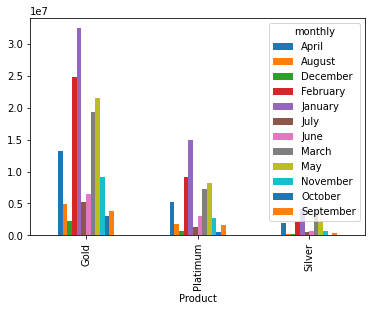

In [58]:
prod_mon.plot(kind='bar')
plt.xlabel='Product'

#### 5.UDF

In [59]:
repayment.head(2)

,Customer,Month,Amount,monthly_repay,yearly_repay
0,A1,2004-01-12,495414.75,01,2004
1,A1,2004-01-03,245899.02,01,2004


In [60]:
customer.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [64]:
cust_repayment['Month'] = pd.to_datetime(cust_repayment['Month'])
cust_repayment['monthly'] = cust_repayment['Month'].apply(lambda x : pd.Timestamp.strftime(x,format='%m'))
cust_repayment['yearly'] = cust_repayment['Month'].apply(lambda x : pd.Timestamp.strftime(x,format ='%Y'))
cust_repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,monthly,yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,01,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,01,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,01,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,01,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,01,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,01,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,01,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,01,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,01,2004


In [97]:
def top10Customers(product_cat,time_period):
    return cust_repayment.loc[(cust_repayment.Product == product_cat)].groupby(['Customer','City','Product','yearly']).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [98]:
product_cat=str(input("Please Enter product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter time period should be in yearly/monthly: "))

Please Enter product category should be in Gold/Silver/Platinum: Silver
Please Enter time period should be in yearly/monthly: yearly


In [99]:
top10Customers=top10Customers(product_cat,time_period)

In [100]:
top10Customers

,Customer,City,Product,yearly,Amount
14,A24,DELHI,Silver,2005,1184870.98
8,A22,BOMBAY,Silver,2005,1141542.81
20,A46,PATNA,Silver,2005,1116730.89
18,A25,COCHIN,Silver,2006,1000030.00
11,A23,BANGALORE,Silver,2005,1000010.00
22,A57,TRIVANDRUM,Silver,2004,1000010.00
7,A22,BOMBAY,Silver,2004,953419.47
9,A22,BOMBAY,Silver,2006,945271.83
12,A23,BANGALORE,Silver,2006,872925.32
21,A46,PATNA,Silver,2006,839228.07
